In [1]:
using Distributions,SpecialFunctions,Random,Plots,StatsPlots

Q1


$ X_1,X_2,...,X_n \sim F $ (iid draws) and $ Y_1, Y_2, ..., Y_n $ is a Markov Chain with F as the stationary distribution. $\\$
Consider the estimates of mean:$\\$

$$ \bar X = \frac{1}{n}\sum_{i=1}^{n}X_i  \space and \space  \bar Y =\frac{1}{n}\sum_{i=1}^{n}Y_i \\$$ 

We know Variance is $\\$
$$ Var(\sum_{i=1}^{p} a_iX_i)=\sum_{i=1}^{p}(a_i)^2Var(X_i)+2\sum_{1\le i<j\le p} a_ia_jCov(X_i,X_j) \\$$

So for first iid distribution $ Cov(X_i,X_j) $ is Zero whereas for Markov Chain it is not zero as $ X_n $ is dependent on $ X_{n-1} \\$

$$ Var(\bar X)=\frac{ Var(\sum_{i=1}^{n} X_i)}{N^2} \\$$

Similarly for $$ Var(\bar Y)=\frac{ Var(\sum_{i=1}^{n} Y_i)}{N^2} \\ $$

For IIDS as $Cov(X_i,X_j)$ is 0 whereas for Markov it is not zero hence Variance will have addition terms.$\\$
Also, Initally the sample from MCMC can vary greatly from F hence increasing the Variance.$\\$
 So , $ Var(\bar X)<Var(\bar Y) $
 


Hence IID is better Esitmator.

Q2

We know $$ Y_i/\mu \sim N(\mu,1)  \\ $$
Along with $$ \mu/v \sim t_v \\ $$
Where $$ v \sim gamma(a_0,b_0,(2,\infty)) \\ $$
Let $ \theta $  be the vector containing prior information, $ \theta = (\mu,v) \\$

So, Posterior density is $\\$
$$ q(\theta/y_i)=q(\mu,v/y_i)\\$$
$$ q(\theta,y_i)=\frac{f(y_i/\mu,v)f(\mu,v)}{\int_{\theta}^{} f(y_i/\mu,v)f(\mu,v) } \\$$
$$ q(\theta,y_i) \propto f(y_i/\mu)f(\mu,v)f(v) \\$$
Let $$ \pi(\mu,v)=f(y_i/\mu)f(\mu,v)f(v)\\ $$
$$ \pi(\mu,v)=v^{a_0-1}e^{\frac{-v}{b_0}}I({\mu>2})(1+\frac{\mu^2}{v})^{-\frac{v+1}{2}}\prod_{i=1}\exp^{-\frac{(y_i-\mu)^2}{2}} \\$$
Then Joint postertior distribution is $c\pi(\mu,v)$ where c is normalising constant

We will use a Bivariate Normal Distribution proposal, centred at the current value with both RV's independent. So  $q(\mu,v/x)$ will the density of the distribution $N(\mu,v,\sigma_1,\sigma_2,0)$ where $\sigma_1,\sigma_2$ is similar to stepsize. We can choose a starting value as the random value of the truncated gamma function. We can set $\sigma_1=1$ and $\sigma_2=1$ for now.

1.Set $x_1$ as mean of $gamma(a_0,b_0,(2,\infty))$ and take a random t-dist for v $\\$
2.Draw a proposed value $ Y^{\star}=(\mu^{\star},v^{\star}) \sim N(\mu_t,v_t,1,1,0) \\$
3.Calculate $$\alpha(X_t,Y^{\star})=min(1,\frac{\pi(Y^{\star})q(X_t/Y^{\star})}{\pi(X_t)q(Y^{\star}/X_t)}) $$ where $X_t=(\mu_t,v_t) \space and \space Y^{\star}=(\mu^{\star},v^{\star})\\$
As Normal is symmetric $$\alpha(X_t,Y^{\star})=min(1,\frac{\pi(Y^{\star})}{\pi(X_t)}) $$ 

4. Draw $ U \sim U[0,1].\space If \space U<\alpha(X_t,Y^{\star})$. Set $X_{t+1}=Y^{\star}\\$
5.Else, set $ X_{t+1}=X_t\\ $
6.Stop when t=T.

In [51]:
#Setting the global index
global a0=2
global b0=0.1
global n=100

100

In [52]:
global arr_y=[]
for i in 1:n
    x=rand(Normal(0,1))
    push!(arr_y,x)
end    

In [73]:
#Calculating value of pie(mu,v)
function pie(mu,v)
    if(mu<2)
        return 0
    else
        res=real((complex(v)^(a0-1))*(exp(-v/b0))*(complex(1+(mu^2)/v))^(-(v+1)/2))
        for i in 1:100
            res*=(exp((arr_y[i]-mu)^2)/2)
        end
        return res
    end
    
end            

pie (generic function with 1 method)

In [74]:
#function to find new point
function newpoint(curr)
    mu_new=rand(Normal(curr[1],1))
    v_new=rand(Normal(curr[2],1))
    res=[]
    push!(res,mu_new)
    push!(res,v_new)
    return res
end

newpoint (generic function with 1 method)

In [84]:
#Function calculating alpha
function cal(new_1::Number,new_2::Number,curr_1::Number,curr_2::Number)
    mh=pie(new_1,new_2)/pie(curr_1,curr_2)
    return min(1,mh)
end    

cal (generic function with 2 methods)

In [93]:
global sample=[[]]
global arr_x=[]
global arr_y=[]
curr=[]
mu=rand(truncated(Gamma(a0,b0); lower=2))
v=rand(TDist(mu))
push!(curr,mu)
push!(curr,v)
push!(sample,curr)
for i in 1 : 1000
    new=newpoint(curr)
    print(new)
    print(curr)
    alpha=cal(new[1],new[2],curr[1],curr[0])
    print(alpha)
    u=rand(Uniform(0,1))
    if u<alpha
        curr=new
    end    
    #push!(sample,curr)
    #push!(arr_x,curr[1])
    #push!(arr_y,curr[2])
end



Any[1.2172493939722426, 1.1205416081499453]Any[2.041396353200814, -1.0778964005602512]

LoadError: BoundsError: attempt to access 2-element Vector{Any} at index [0]

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_position, legend_t

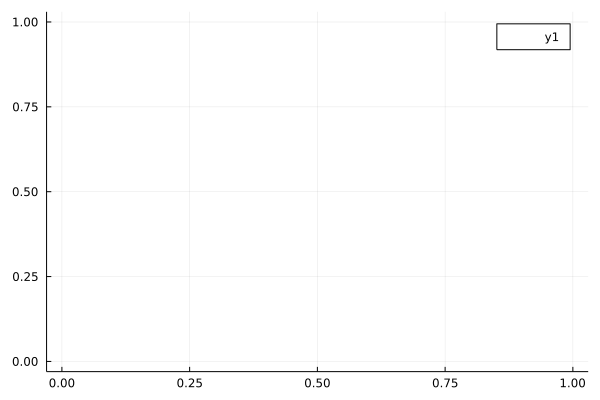

In [70]:
scatter(arr_x,arr_y)     